# Capstone Project
# Predicting the Religion Distribution of Australian Suburb Towns
### Applied Data Science Capstone by IBM/Coursera (The Battle of the Neighborhoods ,Week 2)

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Politics is a blend of the government, political parties and the politicians of a country. In Australia, the political discourse has an apperent influence on the life of people, including immigration, cost of housing, the freedom and rights of an individual and many more.

As stated by Winston Churchill, "Politics is not a game, but a serious business". Political parties have both long term and short term plans, when preparing for their propaganda. They consider various factors such as average income per person, religion distribution, employment distribution, natural resources distribution, in each area for an insightful planning. They take the advantage of each factor when appointing candidates for an area, organizing meetings, workshops, other volunteer work etc.

My project focuses on predicting the religion distribution of the suburb towns in Australia by clustering them based on the most common religious venues in each town which would help the future campaigns of a political party.

## Data <a name="data"></a>

Information on all Australian towns were downloaded as a csv file from https://www.australiantownslist.com. This includes geographical data (latitude and longitude coordinates), name, state, postal code, type(whether it is urban or a suburb), population, median income, area etc. 

In [1]:
import pandas as pd

In [2]:
df_data = pd.read_csv('au-towns-sample.csv')
df_data.head()

,id,name,urban_area,state_code,state,postcode,type,latitude,longitude,elevation,population,median_income,area_sq_km,local_government_area,region,time_zone
0,1,Aarons Pass,NaN,NSW,New South Wales,2850,Rural locality,-32.86328,149.80375,804,22,29900,82.764,Mid-Western Regional (Area),Central West,Australia/Sydney
1,2,Abba River,NaN,WA,Western Australia,6280,Rural locality,-33.68488,115.46334,23,68,35100,28.516,Busselton (City),Bunbury,Australia/Perth
2,3,Abbey,Busselton,WA,Western Australia,6280,Suburb,-33.66077,115.25863,7,1275,34580,2.644,Busselton (City),Bunbury,Australia/Perth
3,4,Abbeyard,NaN,VIC,Victoria,3737,Rural locality,-36.96978,146.75244,415,0,0,327.501,Alpine (Shire),Hume,Australia/Melbourne
4,5,Abbeywood,NaN,QLD,Queensland,4613,Rural locality,-26.10688,151.62880,429,23,16484,35.035,South Burnett (Regional Council),Wide Bay,Australia/Brisbane


### Data Cleaning
The rows which contain zero population were dropped.

In [3]:
df = df_data[df_data.population != 0]
df.head()

,id,name,urban_area,state_code,state,postcode,type,latitude,longitude,elevation,population,median_income,area_sq_km,local_government_area,region,time_zone
0,1,Aarons Pass,NaN,NSW,New South Wales,2850,Rural locality,-32.86328,149.80375,804,22,29900,82.764,Mid-Western Regional (Area),Central West,Australia/Sydney
1,2,Abba River,NaN,WA,Western Australia,6280,Rural locality,-33.68488,115.46334,23,68,35100,28.516,Busselton (City),Bunbury,Australia/Perth
2,3,Abbey,Busselton,WA,Western Australia,6280,Suburb,-33.66077,115.25863,7,1275,34580,2.644,Busselton (City),Bunbury,Australia/Perth
4,5,Abbeywood,NaN,QLD,Queensland,4613,Rural locality,-26.10688,151.62880,429,23,16484,35.035,South Burnett (Regional Council),Wide Bay,Australia/Brisbane
5,6,Abbotsbury,Sydney,NSW,New South Wales,2176,Suburb,-33.87754,150.86777,80,4253,37492,4.979,Fairfield (City),Sydney - South West,Australia/Sydney


Then, only the Suburbs were filtered out.

In [4]:
df_sub = df.loc[df['type'] == 'Suburb']
df_sub.head(20)

,id,name,urban_area,state_code,state,postcode,type,latitude,longitude,elevation,population,median_income,area_sq_km,local_government_area,region,time_zone
2,3,Abbey,Busselton,WA,Western Australia,6280,Suburb,-33.66077,115.25863,7,1275,34580,2.644,Busselton (City),Bunbury,Australia/Perth
5,6,Abbotsbury,Sydney,NSW,New South Wales,2176,Suburb,-33.87754,150.86777,80,4253,37492,4.979,Fairfield (City),Sydney - South West,Australia/Sydney
6,7,Abbotsford,Sydney,NSW,New South Wales,2046,Suburb,-33.85247,151.12945,24,5373,50180,1.018,Canada Bay (Area),Sydney - Inner West,Australia/Sydney
8,9,Abbotsford,Melbourne,VIC,Victoria,3067,Suburb,-37.80329,145.00043,25,8184,55536,1.741,Yarra (City),Melbourne - Inner,Australia/Melbourne
12,13,Abercrombie,Bathurst,NSW,New South Wales,2795,Suburb,-33.38996,149.55047,661,1109,42276,2.978,Bathurst Regional (Area),Central West,Australia/Sydney
14,15,Aberdare,Cessnock,NSW,New South Wales,2325,Suburb,-32.84420,151.37651,95,2473,26572,3.296,Cessnock (City),Hunter Valley exc Newcastle,Australia/Sydney
17,18,Aberfeldie,Melbourne,VIC,Victoria,3040,Suburb,-37.75669,144.89626,44,3897,45604,1.552,Moonee Valley (City),Melbourne - Inner,Australia/Melbourne
20,21,Aberfoyle Park,Adelaide,SA,South Australia,5159,Suburb,-35.07628,138.59372,187,11039,34684,5.844,Onkaparinga (City),Adelaide - South,Australia/Adelaide
21,22,Aberglasslyn,Maitland,NSW,New South Wales,2320,Suburb,-32.69466,151.53461,39,5401,39416,6.216,Maitland (City),Hunter Valley exc Newcastle,Australia/Sydney
23,24,Abermain,Kurri Kurri,NSW,New South Wales,2326,Suburb,-32.81082,151.42867,34,2337,25896,15.382,Cessnock (City),Hunter Valley exc Newcastle,Australia/Sydney


The columns: 'name', 'state', 'latitude', 'longitude', 'postcode' and 'population' were filtered out from the above dataframe.

In [5]:
df_new = df_sub.filter(['name','state','latitude','longitude','postcode','population'], axis=1).reset_index(drop=True)
df_new.rename({'name': 'Town','state':'State'}, axis=1, inplace=True) 
df_new.head()

,Town,State,latitude,longitude,postcode,population
0,Abbey,Western Australia,-33.66077,115.25863,6280,1275
1,Abbotsbury,New South Wales,-33.87754,150.86777,2176,4253
2,Abbotsford,New South Wales,-33.85247,151.12945,2046,5373
3,Abbotsford,Victoria,-37.80329,145.00043,3067,8184
4,Abercrombie,New South Wales,-33.38996,149.55047,2795,1109


In [6]:
df_new.shape

(127, 6)

In [7]:
df_new['State'].unique()

array(['Western Australia', 'New South Wales', 'Victoria',
       'South Australia', 'Queensland', 'Australian Capital Territory',
       'Tasmania', 'Northern Territory'], dtype=object)

In [8]:
df_V = df_new[df_new['State'] == 'New South Wales'].reset_index(drop=True)
df_V.head()

,Town,State,latitude,longitude,postcode,population
0,Abbotsbury,New South Wales,-33.87754,150.86777,2176,4253
1,Abbotsford,New South Wales,-33.85247,151.12945,2046,5373
2,Abercrombie,New South Wales,-33.38996,149.55047,2795,1109
3,Aberdare,New South Wales,-32.84420,151.37651,2325,2473
4,Aberglasslyn,New South Wales,-32.69466,151.53461,2320,5401


## Methodology <a name="methodology"></a>

In [9]:
import sys
!{sys.executable} -m pip install geopy
import geopy
from geopy.geocoders import Nominatim

import json 

import requests 

from pandas.io.json import json_normalize

!{sys.executable} -m pip install matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

!{sys.executable} -m pip install folium
import folium

print('Libraries imported.')

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Libraries imported.


#### Mapping the Australian suburbs

Nominatim was used to get the geographical coordinates of Australia and a map of Australia was constructed using Folium. A for loop was used to iterate through columns of df_new to mark the suburb towns on the map.

In [10]:
address = 'Australia, au'

geolocator = Nominatim(user_agent="au_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Australia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Australia are -24.7761086, 134.755.


In [11]:
map_aus = folium.Map(location=[latitude, longitude], zoom_start=4)

for lat, lng, town, st in zip(df_new['latitude'], df_new['longitude'], df_new['Town'], df_new['State']):
    label = '{}, {}'.format(town, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_aus)  
    
map_aus

Religious venue categories around each suburb town is needed. First, a Foursquare GET request was made to get the religious venue categories around the first town in df_new. Here, a category id was used in the Foursquare url in order to get only the religious venue categories. The venues around a radius of 2km was considered and the maximum number of venues expected around each town was 100.


In [12]:
CLIENT_ID ='JJS5SUNYXVMGRHDDCMUFO4OGWNUM0XEAU3S3COOLOEUYHJNM' 
CLIENT_SECRET ='ZTUR03X4DDVUS1A15UMIMTL00NJJDWR1DEINEUM20CPGMVFC' 
VERSION ='20200822'

In [13]:
First_latitude = df_new.loc[1, 'latitude'] 
First_longitude = df_new.loc[1, 'longitude'] 

First_town = df_new.loc[1, 'Town'] 

print('Latitude and longitude values of {} are {}, {}.'.format(First_town, 
                                                               First_latitude,First_longitude))

Latitude and longitude values of Abbotsbury are -33.87754, 150.86777.


In [14]:
LIMIT = 100
radius = 2000
Cat_id = '4bf58dd8d48988d131941735'
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    First_latitude, 
    First_longitude, 
    radius, 
    LIMIT,
    Cat_id
)

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4155ad17a4de7fae2a0f84'},
 'response': {'venues': [{'id': '4da02428784f37045ed792af',
    'name': 'John The Baptist Church',
    'location': {'address': 'Mount Street',
     'lat': -33.8874276477837,
     'lng': 150.86317045741822,
     'labeledLatLngs': [{'label': 'display',
       'lat': -33.8874276477837,
       'lng': 150.86317045741822}],
     'distance': 1179,
     'cc': 'AU',
     'city': 'Bonnyrigg',
     'state': 'NSW',
     'country': 'Australia',
     'formattedAddress': ['Mount Street', 'Bonnyrigg NSW', 'Australia']},
    'categories': [{'id': '4bf58dd8d48988d132941735',
      'name': 'Church',
      'pluralName': 'Churches',
      'shortName': 'Church',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1598117814',
    'hasPerk': False},
   {'id': '4dafa3a343a1e3d9e64bbfad',
    'name': 'Lao Buddhist Temple',
    'locati

An empty dataframe (df_venues) was created with column names 'Town', 'State', 'Venue_name', 'Venue_latitude', 'Venue_longitude'and 'Venue_category'. By iterating through df_new using a for loop, the nearby religious venue details of each town was retrieved through Foursquare. Then the details were fed into the dataframe, df_venues.

Surprisingly, this dataframe contained venue categories which are not religious venues. This is because when we are considering the latitude and longitude of a specific point, foursquare may capture many venue categories. For example a building could have a church at the ground floor while having a restaurant in an upper floor. So a religious_list was created and venue categories which only belongs to this religious_list was taken out of the json file. 

In [16]:
# define the dataframe columns
column_names = ['Town', 'State', 'Venue_name', 'Venue_latitude', 'Venue_longitude','Venue_category'] 

# instantiate the dataframe
df_venues = pd.DataFrame(columns=column_names)
df_venues

religious_list =['Church', 'Buddhist Temple', 'Temple', 'Synagogue','Mosque', 'Sikh Temple', 
                                 'Hindu Temple','Prayer Room','Shrine','Spiritual Center']

i = 0
for nam, st, lat, lng in zip(df_new['Town'],df_new['State'],df_new['latitude'],df_new['longitude']):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            Cat_id)
            
        # make the GET request
        results = requests.get(url).json()
        
        for venue in results['response']['venues']:
            venue_nam =  venue['name'] 
            venue_lat = venue['location']['lat']
            venue_lon = venue['location']['lng']
            
            for cat in venue['categories']:
                if cat['name'] in religious_list:
                    venue_list = []
                    venue_list.append(nam)
                    venue_list.append(st)
                    venue_list.append(venue_nam)
                    venue_list.append(venue_lat)
                    venue_list.append(venue_lon)
                    venue_list.append(cat['name'])
                    df_venues.loc[i] = venue_list
                    i = i + 1
             

In [17]:
df_venues.head()

,Town,State,Venue_name,Venue_latitude,Venue_longitude,Venue_category
0,Abbotsbury,New South Wales,John The Baptist Church,-33.887428,150.863170,Church
1,Abbotsbury,New South Wales,Lao Buddhist Temple,-33.885336,150.885159,Buddhist Temple
2,Abbotsbury,New South Wales,Vat Khemarangsaram Cambodian Buddhist Temple,-33.888448,150.887411,Buddhist Temple
3,Abbotsbury,New South Wales,Parkside Baptist Church,-33.885675,150.884440,Church
4,Abbotsbury,New South Wales,Wat Xaiyaphoum,-33.895833,150.857213,Temple


In [18]:
df_venues['Venue_category'].unique()

array(['Church', 'Buddhist Temple', 'Temple', 'Synagogue',
       'Spiritual Center', 'Mosque', 'Sikh Temple', 'Hindu Temple',
       'Prayer Room', 'Shrine'], dtype=object)

One hot encoding was done considering the 'Venue_category' column of df_venues. This was helpful in counting the total number of venues that falls under different venue categories for each town.

In [19]:
# one hot encoding
venues_onehot = pd.get_dummies(df_venues[['Venue_category']], prefix="", prefix_sep="")
venues_onehot

# add town and state columns back to dataframe
venues_onehot['Town'] = df_venues['Town']
venues_onehot['State'] = df_venues['State']

# constructing the dataframe
column_names = ['Town', 'State', 'Church', 'Buddhist Temple', 'Temple', 'Synagogue','Mosque', 'Sikh Temple', 
                                 'Hindu Temple','Shrine','Prayer Room','Spiritual Center']
venues_onehot = venues_onehot.reindex(columns=column_names)

venues_onehot.head()

,Town,State,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center
0,Abbotsbury,New South Wales,1,0,0,0,0,0,0,0,0,0
1,Abbotsbury,New South Wales,0,1,0,0,0,0,0,0,0,0
2,Abbotsbury,New South Wales,0,1,0,0,0,0,0,0,0,0
3,Abbotsbury,New South Wales,1,0,0,0,0,0,0,0,0,0
4,Abbotsbury,New South Wales,0,0,1,0,0,0,0,0,0,0


The below dataframe shows the total number of venues that falls under different venue categories for each town.

In [20]:
df_grp = venues_onehot.groupby(['Town', 'State']).sum().reset_index()
df_grp.head()

,Town,State,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center
0,Abbotsbury,New South Wales,2,2,2,0,0,0,0,0,0,0
1,Abbotsford,New South Wales,7,0,2,1,0,0,0,0,0,0
2,Abbotsford,Victoria,30,1,5,0,3,0,0,0,0,8
3,Abercrombie,New South Wales,1,0,0,0,0,0,0,0,0,0
4,Aberdare,New South Wales,2,0,0,0,0,0,0,0,0,0


A copy of the above dataframe was made for the convenience of later on coding.

In [21]:
df_copy = df_grp.copy()
df_copy['Population'] = df_V['population']
df_copy.head()

,Town,State,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center,Population
0,Abbotsbury,New South Wales,2,2,2,0,0,0,0,0,0,0,4253.0
1,Abbotsford,New South Wales,7,0,2,1,0,0,0,0,0,0,5373.0
2,Abbotsford,Victoria,30,1,5,0,3,0,0,0,0,8,1109.0
3,Abercrombie,New South Wales,1,0,0,0,0,0,0,0,0,0,2473.0
4,Aberdare,New South Wales,2,0,0,0,0,0,0,0,0,0,5401.0


Each row of the dataframe was sorted in the descending order using a function and a dataframe consisting of the first, second, third, fourth and fifth most common venues for each town was created to be more informative.

In [22]:
import numpy as np

In [23]:
def return_most_common_venues(row, num_top_venues):
    
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues] 

In [24]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town','State']
for ind in np.arange(num_top_venues):
    
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#create a new dataframe
df_venues_sorted = pd.DataFrame(columns=columns)
df_venues_sorted['Town'] = df_grp['Town']
df_venues_sorted['State'] = df_grp['State']
df_venues_sorted.head()

for ind in np.arange(df_grp.shape[0]):
    df_venues_sorted.iloc[ind, 2:] = return_most_common_venues(df_grp.iloc[ind, :], num_top_venues)

df_venues_sorted.head()

,Town,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbotsbury,New South Wales,Temple,Buddhist Temple,Church,Spiritual Center,Prayer Room
1,Abbotsford,New South Wales,Church,Temple,Synagogue,Spiritual Center,Prayer Room
2,Abbotsford,Victoria,Church,Spiritual Center,Temple,Mosque,Buddhist Temple
3,Abercrombie,New South Wales,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple
4,Aberdare,New South Wales,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple


One of the machine learning techniques, K-Means Clustering was used to cluster the towns based on venue categories. Elbow method was used to find the optimal k.

In [25]:
!{sys.executable} -m pip install sklearn  
from sklearn.cluster import KMeans

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [26]:
df_grp.drop(['Town', 'State'], axis=1, inplace=True)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [28]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_grp)
    distortions.append(kmeanModel.inertia_)

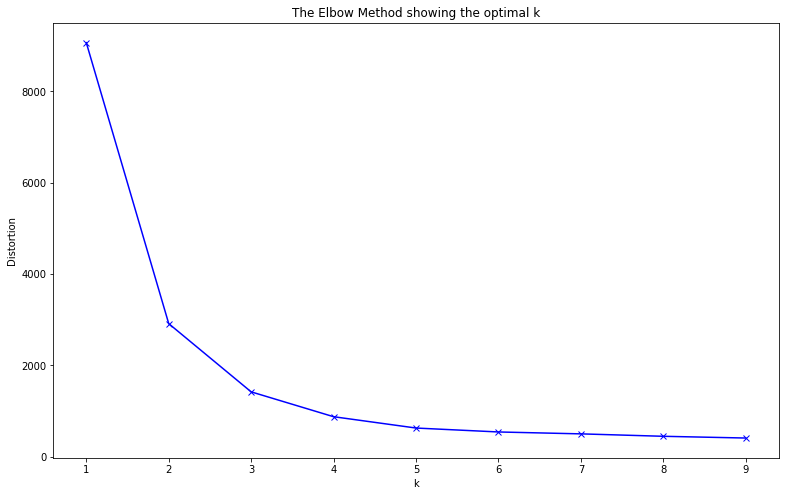

In [29]:
plt.figure(figsize=(13,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grp)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
      dtype=int32)

In [31]:
df_venues_sorted.insert(2,'Cluster Labels', kmeans.labels_)
df_venues_sorted.head()

,Town,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbotsbury,New South Wales,0,Temple,Buddhist Temple,Church,Spiritual Center,Prayer Room
1,Abbotsford,New South Wales,0,Church,Temple,Synagogue,Spiritual Center,Prayer Room
2,Abbotsford,Victoria,1,Church,Spiritual Center,Temple,Mosque,Buddhist Temple
3,Abercrombie,New South Wales,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple
4,Aberdare,New South Wales,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple


## Results <a name="results"></a>

The below dataframe shows the cluster labels of each town along with the other information.

In [32]:
clus_merged = pd.merge(df_new, df_venues_sorted, on=['Town', 'State'])
clus_merged.head()

,Town,State,latitude,longitude,postcode,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbotsbury,New South Wales,-33.87754,150.86777,2176,4253,0,Temple,Buddhist Temple,Church,Spiritual Center,Prayer Room
1,Abbotsford,New South Wales,-33.85247,151.12945,2046,5373,0,Church,Temple,Synagogue,Spiritual Center,Prayer Room
2,Abbotsford,Victoria,-37.80329,145.00043,3067,8184,1,Church,Spiritual Center,Temple,Mosque,Buddhist Temple
3,Abercrombie,New South Wales,-33.38996,149.55047,2795,1109,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple
4,Aberdare,New South Wales,-32.84420,151.37651,2325,2473,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple


Using Folium, the cluster representation of the towns was mapped.

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, tw, st, cluster in zip(clus_merged['latitude'], clus_merged['longitude'], clus_merged['Town'],clus_merged['State'], clus_merged['Cluster Labels']):
    label = folium.Popup(str(tw) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Towns belonging to cluster 0, cluster 1 and cluster 2 were filtered out.

In [34]:
df_0 = clus_merged[clus_merged['Cluster Labels'] == 0].reset_index(drop=True)
df_0.head()

,Town,State,latitude,longitude,postcode,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbotsbury,New South Wales,-33.87754,150.86777,2176,4253,0,Temple,Buddhist Temple,Church,Spiritual Center,Prayer Room
1,Abbotsford,New South Wales,-33.85247,151.12945,2046,5373,0,Church,Temple,Synagogue,Spiritual Center,Prayer Room
2,Abercrombie,New South Wales,-33.38996,149.55047,2795,1109,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple
3,Aberdare,New South Wales,-32.84420,151.37651,2325,2473,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple
4,Aberfoyle Park,South Australia,-35.07628,138.59372,5159,11039,0,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple


In [35]:
df_0.shape

(74, 12)

In [36]:
df_1 = clus_merged[clus_merged['Cluster Labels'] == 1].reset_index(drop=True)
df_1.head()

,Town,State,latitude,longitude,postcode,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbotsford,Victoria,-37.80329,145.00043,3067,8184,1,Church,Spiritual Center,Temple,Mosque,Buddhist Temple
1,Alexandria,New South Wales,-33.90985,151.19278,2015,8262,1,Church,Spiritual Center,Mosque,Temple,Synagogue
2,Allawah,New South Wales,-33.97002,151.11452,2218,5706,1,Church,Spiritual Center,Synagogue,Prayer Room,Shrine
3,Annandale,New South Wales,-33.88144,151.17068,2038,9451,1,Church,Temple,Buddhist Temple,Spiritual Center,Mosque
4,Armadale,Victoria,-37.85532,145.01914,3143,9054,1,Church,Synagogue,Spiritual Center,Temple,Prayer Room


In [37]:
df_1.shape

(9, 12)

In [38]:
df_2 = clus_merged[clus_merged['Cluster Labels'] == 2].reset_index(drop=True)
df_2.head()

,Town,State,latitude,longitude,postcode,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aberfeldie,Victoria,-37.75669,144.89626,3040,3897,2,Church,Spiritual Center,Prayer Room,Shrine,Hindu Temple
1,Acacia Gardens,New South Wales,-33.73355,150.91371,2763,3798,2,Church,Sikh Temple,Hindu Temple,Spiritual Center,Prayer Room
2,Ainslie,Australian Capital Territory,-35.26215,149.14589,2602,5189,2,Church,Temple,Spiritual Center,Prayer Room,Shrine
3,Alberton,South Australia,-34.85922,138.51953,5014,1818,2,Church,Spiritual Center,Mosque,Temple,Prayer Room
4,Albert Park,South Australia,-34.87831,138.52135,5014,1724,2,Church,Spiritual Center,Mosque,Prayer Room,Shrine


In [39]:
df_2.shape

(27, 12)

#### Understanding the clusters

Cluster labels were inserted to df_copy. Then towns which fall under each cluster was filtered out. These filtered dataframes were used in visualizing the venue category distribution of each cluster.

In [40]:
df_copy.insert(2,'Cluster Labels', kmeans.labels_)
df_copy.head()

,Town,State,Cluster Labels,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center,Population
0,Abbotsbury,New South Wales,0,2,2,2,0,0,0,0,0,0,0,4253.0
1,Abbotsford,New South Wales,0,7,0,2,1,0,0,0,0,0,0,5373.0
2,Abbotsford,Victoria,1,30,1,5,0,3,0,0,0,0,8,1109.0
3,Abercrombie,New South Wales,0,1,0,0,0,0,0,0,0,0,0,2473.0
4,Aberdare,New South Wales,0,2,0,0,0,0,0,0,0,0,0,5401.0


Filtering the the towns that belongs to cluster 0.

In [41]:
df_0_clus = df_copy[df_copy['Cluster Labels'] == 0].reset_index(drop=True)
df_0_clus.head()

,Town,State,Cluster Labels,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center,Population
0,Abbotsbury,New South Wales,0,2,2,2,0,0,0,0,0,0,0,4253.0
1,Abbotsford,New South Wales,0,7,0,2,1,0,0,0,0,0,0,5373.0
2,Abercrombie,New South Wales,0,1,0,0,0,0,0,0,0,0,0,2473.0
3,Aberdare,New South Wales,0,2,0,0,0,0,0,0,0,0,0,5401.0
4,Aberfoyle Park,South Australia,0,6,0,0,0,0,0,0,0,0,0,3798.0


The total number of venue categories within cluster 0 was then determined and assigned to the 'Total' column. (ex: the total number of churches in cluster 0).

In [42]:
df_0_clus.drop(['Town', 'State', 'Cluster Labels', 'Population'], axis=1, inplace=True)

df_0_clus.loc['Total',:]= df_0_clus.sum(axis=0)
df_0_clus.tail()

,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
73,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,240.0,4.0,22.0,1.0,18.0,1.0,2.0,2.0,2.0,28.0


In [43]:
df_0_trns = df_0_clus.T # transpose of df_0_clus 
df_0_trns

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,Total
Church,2.0,7.0,1.0,2.0,6.0,1.0,3.0,7.0,8.0,7.0,...,2.0,2.0,4.0,4.0,1.0,1.0,1.0,4.0,1.0,240.0
Buddhist Temple,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
Temple,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0
Synagogue,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Mosque,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
Sikh Temple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Hindu Temple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Shrine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Prayer Room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Spiritual Center,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,28.0


In [44]:
df_0_new = df_0_trns[['Total']]
df_0_new

,Total
Church,240.0
Buddhist Temple,4.0
Temple,22.0
Synagogue,1.0
Mosque,18.0
Sikh Temple,1.0
Hindu Temple,2.0
Shrine,2.0
Prayer Room,2.0
Spiritual Center,28.0


Visualizing the venue distribution of cluster 0.

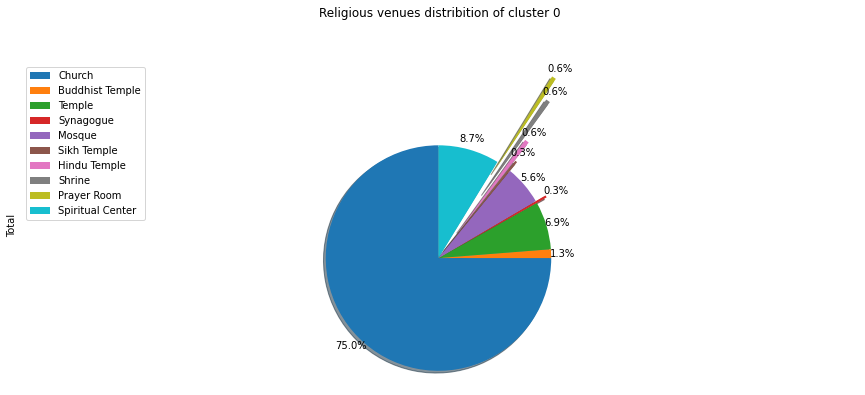

In [45]:
explode_list = [0, 0, 0, 0.1, 0, 0.1, 0.3, 0.7, 0.9, 0]

df_0_new['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Religious venues distribition of cluster 0', y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_0_new.index, loc='upper left') 

plt.show()

Similar coding was done on cluster 1 and cluster 2 in visualizing their venue category distribution. 

In [46]:
df_1_clus = df_copy[df_copy['Cluster Labels'] == 1].reset_index(drop=True)
df_1_clus.head()

,Town,State,Cluster Labels,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center,Population
0,Abbotsford,Victoria,1,30,1,5,0,3,0,0,0,0,8,1109.0
1,Alexandria,New South Wales,1,35,1,3,2,4,0,0,0,0,4,3024.0
2,Allawah,New South Wales,1,24,0,0,1,0,0,0,0,0,1,NaN
3,Annandale,New South Wales,1,36,4,5,1,1,0,0,0,0,3,NaN
4,Armadale,Victoria,1,23,0,3,5,0,0,0,0,0,3,NaN


In [47]:
df_1_clus.drop(['Town', 'State', 'Cluster Labels', 'Population'], axis=1, inplace=True)

df_1_clus.loc['Total',:]= df_1_clus.sum(axis=0)
df_1_clus.tail()

,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center
5,26.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
6,33.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0
7,36.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
8,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
Total,283.0,7.0,20.0,11.0,15.0,0.0,0.0,0.0,2.0,31.0


In [48]:
df_1_trns = df_1_clus.T
df_1_trns.head()

,0,1,2,3,4,5,6,7,8,Total
Church,30.0,35.0,24.0,36.0,23.0,26.0,33.0,36.0,40.0,283.0
Buddhist Temple,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,7.0
Temple,5.0,3.0,0.0,5.0,3.0,1.0,2.0,0.0,1.0,20.0
Synagogue,0.0,2.0,1.0,1.0,5.0,0.0,1.0,1.0,0.0,11.0
Mosque,3.0,4.0,0.0,1.0,0.0,4.0,2.0,1.0,0.0,15.0


In [49]:
df_1_new = df_1_trns[['Total']]
df_1_new

,Total
Church,283.0
Buddhist Temple,7.0
Temple,20.0
Synagogue,11.0
Mosque,15.0
Sikh Temple,0.0
Hindu Temple,0.0
Shrine,0.0
Prayer Room,2.0
Spiritual Center,31.0


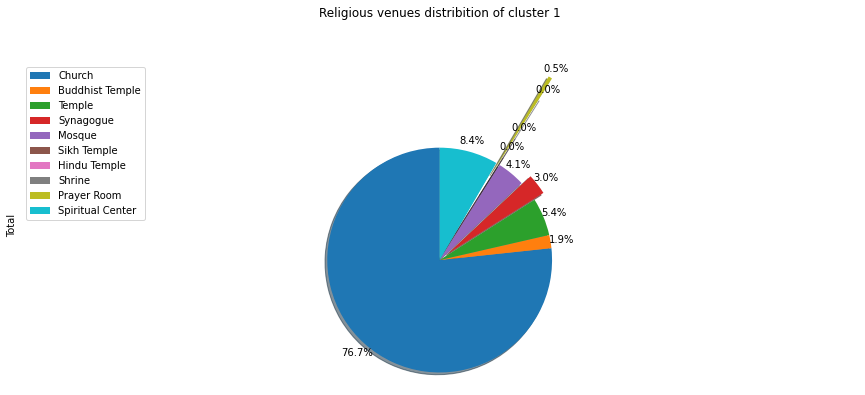

In [50]:
explode_list = [0, 0, 0, 0.1, 0, 0.1, 0.3, 0.7, 0.9, 0]

df_1_new['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Religious venues distribition of cluster 1', y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_1_new.index, loc='upper left') 

plt.show()

In [51]:
df_2_clus = df_copy[df_copy['Cluster Labels'] == 2].reset_index(drop=True)
df_2_clus.head()

,Town,State,Cluster Labels,Church,Buddhist Temple,Temple,Synagogue,Mosque,Sikh Temple,Hindu Temple,Shrine,Prayer Room,Spiritual Center,Population
0,Aberfeldie,Victoria,2,12,0,0,0,0,0,0,0,0,2,2337.0
1,Acacia Gardens,New South Wales,2,9,0,0,0,0,2,1,0,0,0,5299.0
2,Ainslie,Australian Capital Territory,2,16,0,1,0,0,0,0,0,0,0,3109.0
3,Albert Park,South Australia,2,13,0,0,0,2,0,0,0,0,3,1351.0
4,Albert Park,Victoria,2,17,0,5,0,0,0,0,1,0,5,10590.0


In [52]:
df_2_clus.drop(['Town', 'State', 'Cluster Labels', 'Population'], axis=1, inplace=True)

df_2_clus.loc['Total',:]= df_2_clus.sum(axis=0)

df_2_trns = df_2_clus.T

df_2_new = df_2_trns[['Total']]
df_2_new

,Total
Church,369.0
Buddhist Temple,4.0
Temple,21.0
Synagogue,2.0
Mosque,17.0
Sikh Temple,2.0
Hindu Temple,3.0
Shrine,4.0
Prayer Room,0.0
Spiritual Center,33.0


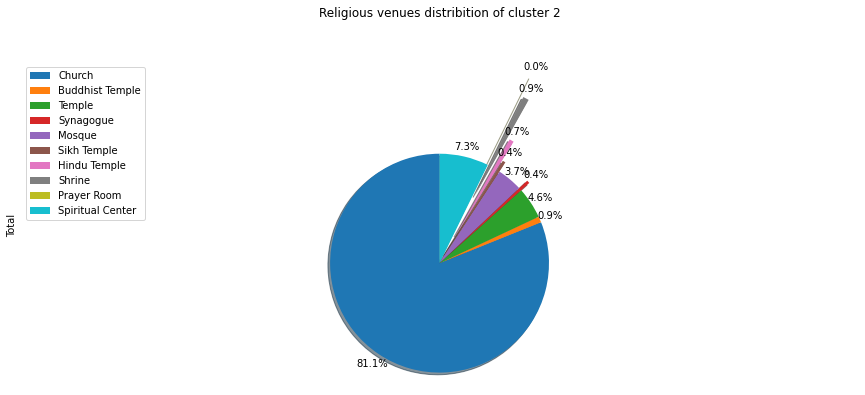

In [53]:
explode_list = [0, 0, 0, 0.1, 0, 0.1, 0.3, 0.7, 0.9, 0]

df_2_new['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Religious venues distribition of cluster 2', y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_2_new.index, loc='upper left') 

plt.show()

Since all three clusters contains around 75% churches, the remaining 25% had to be deeply interpreted. Therefore, the venue distribution of each cluster excluding churches were visualized.

In [54]:
df_0_new.drop('Church', inplace=True)
df_0_new

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total
Buddhist Temple,4.0
Temple,22.0
Synagogue,1.0
Mosque,18.0
Sikh Temple,1.0
Hindu Temple,2.0
Shrine,2.0
Prayer Room,2.0
Spiritual Center,28.0


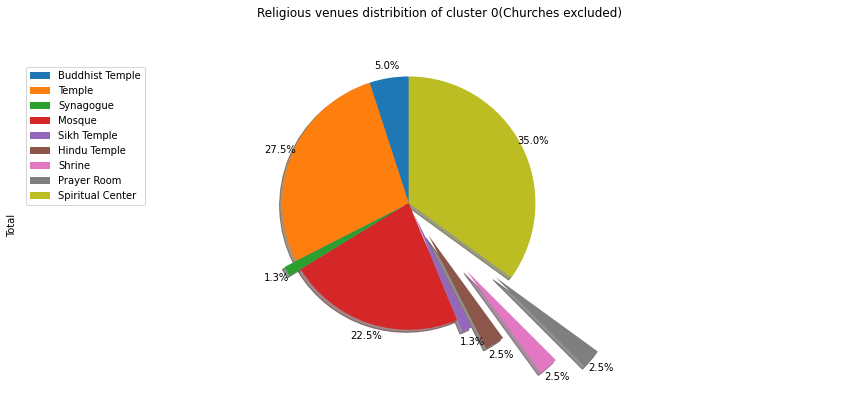

In [55]:
explode_list = [0, 0, 0.1, 0, 0.1, 0.3, 0.7, 0.9, 0]

df_0_new['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Religious venues distribition of cluster 0(Churches excluded)', y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_0_new.index, loc='upper left') 

plt.show()

In [56]:
df_1_new.drop('Church', inplace=True)
df_1_new

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total
Buddhist Temple,7.0
Temple,20.0
Synagogue,11.0
Mosque,15.0
Sikh Temple,0.0
Hindu Temple,0.0
Shrine,0.0
Prayer Room,2.0
Spiritual Center,31.0


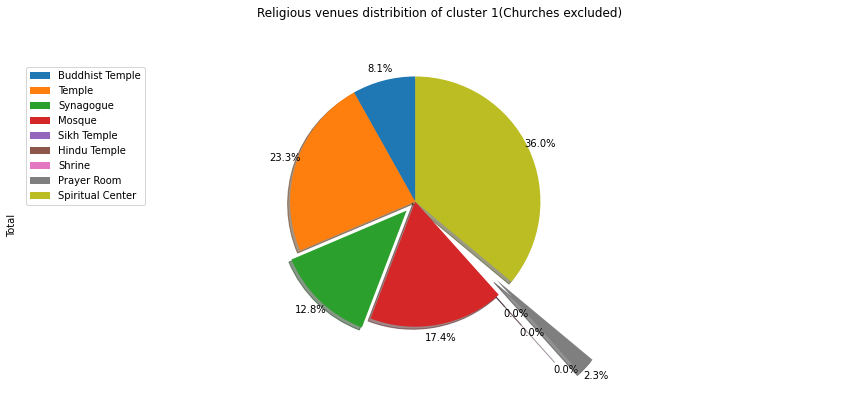

In [57]:
explode_list = [0, 0, 0.1, 0, 0.1, 0.3, 0.7, 0.9, 0]

df_1_new['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Religious venues distribition of cluster 1(Churches excluded)', y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_1_new.index, loc='upper left') 

plt.show()

In [58]:
df_2_new.drop('Church', inplace=True)
df_2_new

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Total
Buddhist Temple,4.0
Temple,21.0
Synagogue,2.0
Mosque,17.0
Sikh Temple,2.0
Hindu Temple,3.0
Shrine,4.0
Prayer Room,0.0
Spiritual Center,33.0


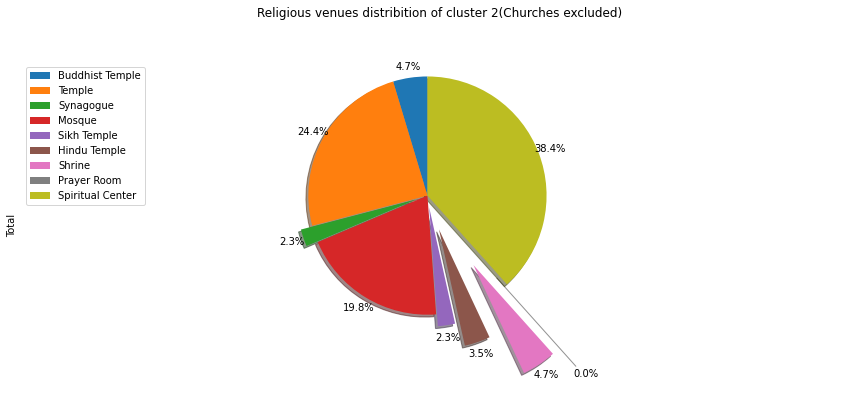

In [59]:
explode_list = [0, 0, 0.1, 0, 0.1, 0.3, 0.7, 0.9, 0]

df_2_new['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct   # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Religious venues distribition of cluster 2(Churches excluded)', y = 1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_2_new.index, loc='upper left') 

plt.show()

## Discussion <a name="discussion"></a>

All three clusters show a majority of churches implying the top most common religion is christians/catholics. 

Although the clusters here seems to be similar with about 75% of churches and around 25% of other religious venues, the difference among the clusters is based on the 25% of venues which contributes to the minor religions.

When studying the minor representation, Islam becomes the top most common religion in all three clusters. In cluster 0, there is a diverse of religions including Hindu, Buddism, Sikh religion and Jewish. Cluster 1 consists of the Jewish, Hindu and Buddhism with considerable aomunt of Jewish. In contrast, cluster 2 does not contain Hindus and has equal amounts of Jewish and Buddhists and is the least diverse cluster.

It is fair enough to assume that religion destribution is strongly correlated with the amount of religious venues for each religion in a town. For example, if there are more mosques, then more islams live there. 

In a nutshell, regardless of the majorities; Christian/catholic and Islam, towns of cluster 0 has a variety of religions and cluter 1 with more Jews and Hindus while cluster 2 with Jews and Buddists.

## Conclusion <a name="conclusion"></a>

In this study, the suburb towns of Australia were categorized into three clusters depending on the religious venue distribution of each town using 'K-Means Clustering'. The venue distribution of each cluster was then considered and used to predict the religion distribution of the three clusters. Thus, a political party could have an idea about the religion distribution of each town by figuring out, which cluster this town belongs to.

I reccomend that a political party would consider each cluster with Christian/catholic as the top most religion and the Islam being the second while the minority being multi-religions in cluster 0, more Jews and Hindus in cluster 1 and Jews and Buddists in cluster 2. By the way, a political party could organize similar campaigns in towns which belongs to the same cluster and consider the religion distribution of each town to make important dicisions in their future endeavors.